# Simple Health Data Sharing Model in R

Our model that we present in chapter named ***From Causal Loop Diagrams to System Dynamics Models in a Data-rich Ecosystem***, we presented a simple model of data sharing and patient health.  The following figure shows the stock and flow diagram.  Stock and flow diagrams are developed based on an interdisciplinary effort which can start from a causal loop diagram (CLD).  

![***Stock and Flow Diagram***](StockFlowDataShare.png)


This model is developed based on the premise that patients in hospitals have the option to share their Electronic Medical Records (EMR) data.  We have four stock variables in our model: Patients $P$, Shared EMR Data $D_S$,  Health Research Data $D_R$, and Approved Treatments $T$.  These stock and flow variables are mathematically defined as derivatives.


\begin{align}
\text{Patients in hospitals (stock):}&\quad  \frac{\mathrm{d}P(t)}{\mathrm{d}t} =  IP(t) - OP(t) \\[1em]
\text{Admissions (inflow): }&\quad IP(t) = SP(t) \\[1em]
\text{Discharges (outflow): }&\quad OP(t) = \lambda \cdot P(t) \\[1em]
\text{Shared EMR Data (stock):}&\quad \frac{\mathrm{d}D_\mathrm{S}(t)}{\mathrm{d}t} = ID_\mathrm{S}(t)  \\[1em]
\text{Creation of Shared EMR Data (inflow):}&\quad ID_\mathrm{S}(t) = P(t) \cdot \widehat{D}_\mathrm{S}(t)\\[1em]
\text{Health Research Data (stock):}&\quad \frac{\mathrm{d}D_\mathrm{R}(t)}{\mathrm{d}t} = ID_\mathrm{R}(t)  \\[1em]
\text{Creation of Health Research Data (inflow):}&\quad ID_\mathrm{R}(t) = CT(t) \cdot \widehat{D}_\mathrm{R}(t) \\[1em]
\text{Available Treatments (stock):}&\quad \frac{\mathrm{d}T(t)}{\mathrm{d}t} = IT(t) - OT(t) \\[1em]
\text{Approved Treatments per month (inflow):}&\quad IT(t) = \sigma \cdot RP(t) \cdot CT(t)\\[1em]
\text{Obsolete Treatments per month (outflow):}&\quad OT(t) = \phi \cdot T(t)
\end{align}


Patients stocks are determined by the number of admissions $IP$ and the number of discharges $OP$.  We included an inflow to Shared EMR Data as a variable called $ID_\mathrm{S}$.  The Health Research Data is represented by the Creation of Health Research Data $ID_\mathrm{R}$.  The stock, Approved Treatments, has an inflow and outflow variable, Approved Drugs per year $IT$ and Obsolete Treatments per year $OT$.  





We also have several auxiliary variables and these are mathematically defined as


\begin{align}
\text{Security breeches:}&\quad  S(t) = \alpha \cdot D_\mathrm{S}(t)\\[1em]
\text{Willingness to share EMR data:}&\quad WS(t) = \frac{1}{\beta\cdot S(t)}  \\[1em]
\text{Data shared per patient:}&\quad \widehat{D}_\mathrm{S}(t) = \gamma \cdot WS(t) \\[1em]
\text{General health:}&\quad H(t) = \delta \cdot TR(t) \\[1em]
\text{Sick fraction:}&\quad SF(t) = \min\left(\frac{1}{\zeta \cdot H(t)},\; 1\right) \\[1em]
\text{Sick population:}&\quad SP(t) = \omega \cdot SF(t) \\[1em]
\text{Healthy population:}&\quad HP(t) = \omega - SP(t) \\[1em]
\text{Total data:}&\quad D(t) = D_\mathrm{S}(t) + D_\mathrm{R}(t) \\[1em]
\text{Research productivity:}&\quad RP(t) = \eta_1 + \eta_2 \cdot \ln(D(t)) \\[1em]
\text{Motivation to join a trial:}&\quad MT(t) = \theta \cdot SP(t) \\[1em]
\text{Enrollment per trial:}&\quad EN(t) = HP(t) \cdot MT(t) \\[1em]
\text{Cost per trial:}&\quad C(t) = \nu \cdot EN(t) \\[1em]
\text{Data generated per trial:}&\quad \widehat{D}_\mathrm{R} = \mu \cdot EN(t) \\[1em]
\text{R&D budget:}&\quad R(t) = \rho \cdot \frac{TR(t)}{HP(t)} \\[1em]
\text{Number of clinical trials:}&\quad CT(t) = \frac{R(t)}{C(t)} 
\end{align}



The parameters are represented by greek letters in our model.  We've presented a list of parameters in the following table.

|Variable| Definition|
|-|-|
| $\alpha$ | Security Risk (Percentage) |
| $\beta$ | Sensitivity to security risks |
| $\gamma$ | Unrestricted data sharing  |
| $\delta$ | Availability of treatment on general health |
| $\zeta$ | Inverse relationship between general health and sickness frequency |
| $\eta_1$ | Data Technology Multiplier |
| $\eta_2$ | Data Input Elasticity  |
| $\rho$ |  Market success on R&D budget  |
| $\nu$ | Cost per subject |
| $\sigma$ | Clinical trials multiplier |
| $\theta$ | Sick population effect on enrollment motivation |
| $\lambda$ | Hospital discharge rate |
| $\mu$ | Trial enrollment size on data generated per trial |
| $\phi$ | Obsolete treatment fraction |
| $\omega$ | Population |



## Implmentation in R
### Building the Model
In this section, we implement the conceptual system dynamics model that was developed by an interdisciplinary team of researchers.  Since a system dynamics model is essentially a system of differential equations, we will employ the **deSolve** library in R.  The library includes several different types of solvers like forward/back Euler's method, Runge-Kutta family methods, and other advanced numerical methods.  We will also call the commonly used plotting library, ***ggplot2***, to help us visualize our outputs.


In [1]:
library(deSolve)
library(ggplot2)

We begin by defining the stock variables in the model as a vector in R.

In [2]:
InitStocks <- c(
    P = 100,                  # Patients (People)
    DS = 50,                  # Shared EMR Data
    DR = 100,                 # Health Research Data
    TR = 10                   # Approved Treatments
)

We then define the parameters that inform the equations in our model as a vector.

In [3]:
Parms <- c(
    alpha = 0.1,              # Security Risk (Percentage)
    beta = 1,                 # Sensitivity to security risks
    gamma = 10,               # Unrestricted data sharing 
    delta = 5,                # Availability of treatment on general health
    zeta = 3,                 # Inverse relationship between general health and sickness frequency
    eta1 = 0.3,               # Data Technology Multiplier
    eta2 = 1,                 # Data Input Elasticity 
    rho = 7.5,                # Market success on R&D budget 
    nu = 1,                   # Cost per subject
    sigma = 1,                # Clinical trials multiplier
    theta = 1,                # Sick population effect on enrollment motivation
    lambda = 0.8,             # Hospital discharge rate
    mu = 10,                  # Trial enrollment size on data generated per trial
    phi = 0.05,               # Obsolete treatment fraction
    omega = 50000             # Population
)

The equations of the system dynamics model is defined as a function in the following script.  For more information pertaining to the system dynamics in R, please refer to <cite data-cite="duggan2016system"></cite>

In [4]:
HealthDataMod <- function(time, stocks, parms){
    with(as.list(c(stocks, parms)),{ 
    # Auxiliary Variables
        S = alpha * DS               # Security breeches
        WS =  1/(beta * S)           # Willingness to Share Data
        DShat = gamma * WS           # Data shared per patient
        H = delta * TR               # General Health 
        SF = min(1 / (zeta * H), 1)  # Sick fraction
        SP = omega * SF              # Sick population
        HP = omega - SP              # Healthy population
        D = DS + DR                  # Total data
        RP = eta1 + eta2 * log(D)    # Research productivity
        MT = theta * SP              # Motivation to join a clinical trial
        EN = HP * MT                 # Enrollment per trial
        C = nu * EN                  # Cost per trial
        DRhat = mu * EN              # Data generated per trial
        R = rho * TR / HP            # R&D budget
        CT = R / C                   # Number of clinical trials
      
    # Flows
        IP = omega * SF              # Number of hospital admissions
        OP = lambda * P              # Number of hospital discharges
        IDS = P * DShat              # Creation of shared EMR data
        IDR = CT * DRhat             # Creation of health reasearch data
        IT =  sigma * RP * CT        # Approved treatments per month
        OT = phi * TR                # Obsolete treatments per month
      
    # Stocks
        dP_dt = IP - OP              # Patients in Hospitals
        dDS_dt = IDS                 # Shared EMR Data
        dDR_dt = IDR                 # Health research data
        dTR_dt = IT - OT             # Available treatments
      
        dstocks = c(dP_dt, dDS_dt, dDR_dt, dTR_dt)
    # Output
        return(list(dstocks,
        H = H,                     # General health
        WS = WS,                   # Willingness to share
        R = R,                     # R&D budget
        MT = MT,                   # Motivation to join a clinical trial
        S = S                      # Security breeches
    ))
  })
}

After the model's variables and equations are defined, we can initialize and run the model with the following command.  The output is stored in the *modout* variable.

In [5]:
t0 = 1
tf = 100
tstep = 1
trange = seq(t0,tf,tstep)
ModOut = ode(y = InitStocks, times = trange, func = HealthDataMod, parms = Parms, method = 'rk4')
head(ModOut)

time,P,DS,DR,TR,H,WS,R,MT,S
1,100.0000,50.0000,100.0000,10.000000,50.00000,0.20000000,0.001510067,333.3333,5.00000
2,280.2977,207.1728,100.0147,9.512294,47.56147,0.04826889,0.001436915,350.4237,20.71728
3,373.7992,330.7048,100.0288,9.048374,45.24187,0.03023845,0.001367330,368.3903,33.07048
4,428.7101,435.9749,100.0421,8.607080,43.03540,0.02293710,0.001301140,387.2781,43.59749
5,466.8382,528.9826,100.0548,8.187308,40.93654,0.01890422,0.001238178,407.1342,52.89826
6,498.0679,613.5033,100.0669,7.788008,38.94004,0.01629983,0.001178288,428.0085,61.35033


We can plot the output in the following figure using the basic R plotting features.

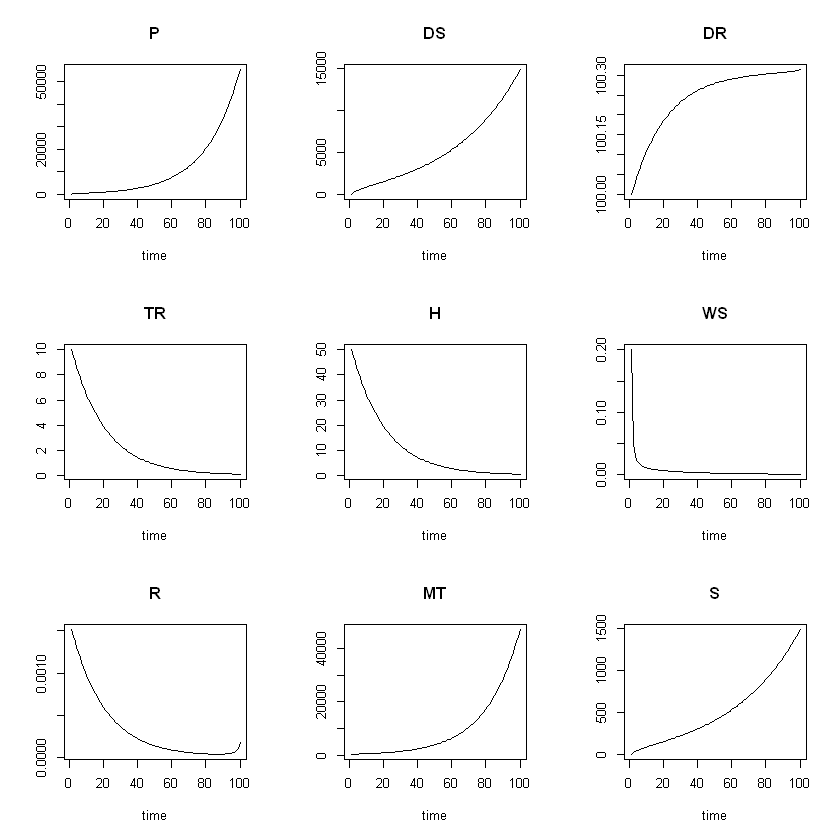

In [6]:
plot(ModOut)

Now that we have the general behavior of all the output variables.   Please note that the output variables include all the stocks and some of the auxiliary variables that we are interested.  

### Integrating Data and Parameterization
We can start comparing the model against data once we have the structural equations set up.  We begin by parameterizing the against some data that we've created created.  In our example, we assumed that there is data for five variables: patients `P`, shared data `DS`, security breaches `S`, approved treatments `TR`, and general health `H`.  For demonstration purposes, we've generated a toy dataset that might realistically depict actual behavior of the system.  The dataset is loaded into R with the following command. 

In [7]:
actualData <- read.csv(file = 'Data.csv',fileEncoding = 'UTF-8-BOM')
head(actualData)

time,Patients,SharedData,SecBreech,Available.Treatments,HealthQualityIndex
1,100,50.00000,0.1478015,10,50.00000
2,101,53.47428,2.5465789,10,48.35782
3,102,63.26773,1.6708363,9,49.53028
4,103,75.07058,0.3320670,9,48.26854
5,106,88.07909,1.9252566,9,47.07393
6,110,100.30397,3.0430370,9,47.96094


We need to rename our dataset so the series name correspond with the model's variables so the solver can compare each the actual data with the simulated data.  We also need to reformat the "wide" table into a "long" table with three columns (*time*, *variable*, and *value*) using the `melt` command from the **reshape** library. 

In [8]:
colnames(actualData) <- c('time','P','DS','S','TR','H')
library(reshape)
longActualData <- melt(actualData, id.vars = 'time')
head(longActualData)

time,variable,value
1,P,100
2,P,101
3,P,102
4,P,103
5,P,106
6,P,110


The fit of a single variable in a model can oftentimes be measured as a residual, which is a difference between the actual and simulated points for each time step $t$.  There are different types of error measurements but for our model we choose *Sum of Squared Weighted Residuals* ($SSR$) as our error measure for each variable $j$ in our model.  This is defined mathematically as

\begin{equation}
SSR_j = \sum_{t=1}^{T}\sum_{i=1}^{N} \left(\frac{\widehat{Y}_{jt} - Y_{ijt}}{w_{j}}\right)^2
\end{equation} 

For time $t$, we can use the system dynamics model to simulate predicted values $\widehat{Y}_{jt}$, and use actual data to represent the true values of our variable $Y_{ijt}$.  $\widehat{Y}_{jt}$ is a function of the parameters $\beta_j$ and intial conditions $Y_j^0$ -- in other words, $\widehat{Y}_{jt} = f(\beta_j,Y_j^{0})$.  We use $i$ to index each time series.  The formulation also includes weights $w_j$ for each variable $j$.  We will assume the weights are the mean value of each variable, which will rescale the residuals and normalize all variable to be independent of units.  We add another column to our dataframe `longActualData` called *weight* which is the mean value of each observed variable.  

In [9]:
modCalVars <- unique(longActualData$variable)
for(i in modCalVars) {
    longActualData$weight[longActualData$variable == i] <- mean(longActualData$value
        [longActualData$variable == i])
}
longActualData = longActualData[,c('variable','time','value','weight')]
head(longActualData)

variable,time,value,weight
P,1,100,200.49
P,2,101,200.49
P,3,102,200.49
P,4,103,200.49
P,5,106,200.49
P,6,110,200.49


In order to quantify the fit of our model, we define the model cost $MC$ as the sum of all the variables' $SSR_j$.

\begin{align}
MC &= \sum_{j=1}^{M} SSR_j \\
   &= \sum_{j=1}^{M} \sum_{t=1}^{T}\sum_{i=1}^{N} \left(\frac{\widehat{Y}_{jt} - Y_{ijt}}{w_{j}}\right)^2 \\
   &= \sum_{j=1}^{M} \sum_{t=1}^{T}\sum_{i=1}^{N} \left(\frac{f\left(\beta_j,Y_j^{0}\right)_{jt} - Y_{ijt}}{w_{j}}\right)^2
\end{align}

We can use the R library **FME** to perform most of our parameter estimation operations.  We can also calculate $MC$ for a given set of parameters by using the `modCost` command to define a cost function.  We define function `CostFunction` that take in a vector of parameters, `p`, as inputs, which is the set of parameters that are being calibrated (defined as $\beta_j$ in our program) and calculates the model cost $MC$.  



In [10]:
library(FME)
CostFunction <- function(p,time,stocks,parms,yactual){
    whichpar <- names(parms)[names(parms) %in% names(p)]
    parms[whichpar] <- p[whichpar]
    ysim <- ode(
        y = stocks, 
        times = time, 
        func = HealthDataMod, 
        parms = parms, 
        method = 'rk4')
    MC <- modCost(
        model = ysim,
        obs = yactual,
        x = 'time',
        y = 'value',
        err = 'weight')
    return(MC)
}

Loading required package: rootSolve
Loading required package: coda


Based on the defined $MC$ cost function, we can develop an optimization program to calibrate our model.  We develop a mathematical program which minimizes the cost function with respect the parameters.

\begin{align}
\min_{\beta_j} &\quad  \sum_{j=1}^{M} \sum_{t=1}^{T}\sum_{i=1}^{N} \left(\frac{f\left(\beta_j,Y_j^{0}\right)_{jt} - Y_{ijt}}{w_{j}}\right)^2\\
\text{subject to}: &\quad \underline{\beta_j} \leq \beta_j \leq \overline{\beta_j} \quad j = 1,\ldots,M
\end{align}

where  $\underline{\beta_j}$ and $\overline{\beta_j}$ are the lower and upper bounds of possible values for our calibrated parameters.  

We utilize a simple heuristic to solve the program with a user-defined function that wraps around `modFit` from the **FME** library and the previously created `CostFunction` into one function called `HealthModFit`.  Using the PORT optimization algorithm, we can determine the best set of parmater values that fit our data. 

In [11]:
HealthModFit <- function(parvalue,parmin,parmax,yactual,time,stocks,parms){
    ModResults <- modFit(
        f = CostFunction,
        p = parvalue,
        lower = parmin,
        upper = parmax,
        time = time,
        stocks = stocks,
        parms = parms,
        yactual = yactual,
        method = 'Port'
    )
    return(ModResults)
}

We assumed that `p` ($\beta_j$) is a subset of all `parms` because not all the parameters need to be calibrated if they are known or assumed a priori.  For example, population size is exogenous and known in our model, so we will not be calibrating `omega` ($\omega$).  In some cases, we may also assume that `p` can include initial conditions.  We also need to define the upper  and lower bound ($\overline{\beta_j}$ and $\underline{\beta_j}$).

In [12]:
p <- c(
    alpha = 0.2,              # Security Risk (Percentage)
    beta = .6,                # Sensitivity to security risks
    gamma = 10,               # Unrestricted data sharing 
    delta = 5,                # Availability of treatment on general health
    zeta = 3,                 # Inverse relationship between general health and sickness frequency
    eta1 = 0.3,               # Data Technology Multiplier
    rho = 7.5,                # Market success on R&D budget 
    nu = .5,                  # Cost per subject
    sigma = 100,              # Clinical trials multiplier
    theta = 1,                # Sick population effect on enrollment motivation
    lambda = 0.8,             # Hospital discharge rate
    phi = 0.05,               # Obsolete treatment fraction
    mu = 10                   # Trial enrollment size on data generated per trial
)
pmin <- c(
    alpha = 0.01,             # Security Risk (Percentage)
    beta = 0.01,              # Sensitivity to security risks
    gamma = 0.01,             # Unrestricted data sharing 
    delta = 0.01,             # Availability of treatment on general health
    zeta = 0.01,              # Inverse relationship between general health and sickness frequency
    eta1 = 0.01,              # Data Technology Multiplier
    rho = 0.01,               # Market success on R&D budget 
    nu = 0.01,                # Cost per subject
    sigma = 1,                # Clinical trials multiplier
    theta = 0.01,             # Sick population effect on enrollment motivation
    lambda = 0.5,             # Hospital discharge rate
    phi = 0.01,               # Obsolete treatment fraction
    mu = 0.01                 # Trial enrollment size on data generated per trial
)
pmax <- c(
    alpha = 1,                # Security Risk (Percentage)
    beta = 100,               # Sensitivity to security risks
    gamma = 200,              # Unrestricted data sharing 
    delta = 100,              # Availability of treatment on general health
    zeta = 100,               # Inverse relationship between general health and sickness frequency
    eta1 = 100,               # Data Technology Multiplier
    rho =  100,               # Market success on R&D budget 
    nu = 100,                 # Cost per subject
    sigma = 100,              # Clinical trials multiplier
    theta = 100,              # Sick population effect on enrollment motivation
    lambda = 1,               # Hospital discharge rate
    phi = 1,                  # Obsolete treatment fraction
    mu = 100                  # Trial enrollment size on data generated per trial
)

Now that all the variables are defined, we can run our calibration heuristic and obtain the paramter solution.  Depending on the optimization algorithm, this will take some time to compute.

In [13]:
HealthCalibOut <- HealthModFit(p,pmin,pmax,longActualData,trange,InitStocks,Parms)

After the fit is complete, we can print out the model cost, which is the total SSR for the model.  

In [14]:
print(HealthCalibOut$ssr) # print model cost

[1] 52.86146


We can also perform a simple error analysis by looking at the residuals between the "actual" and simulated data.  This is quantified as the mean square error (MSE), and the MSE is plotted for our five state variable in the following barplot. 

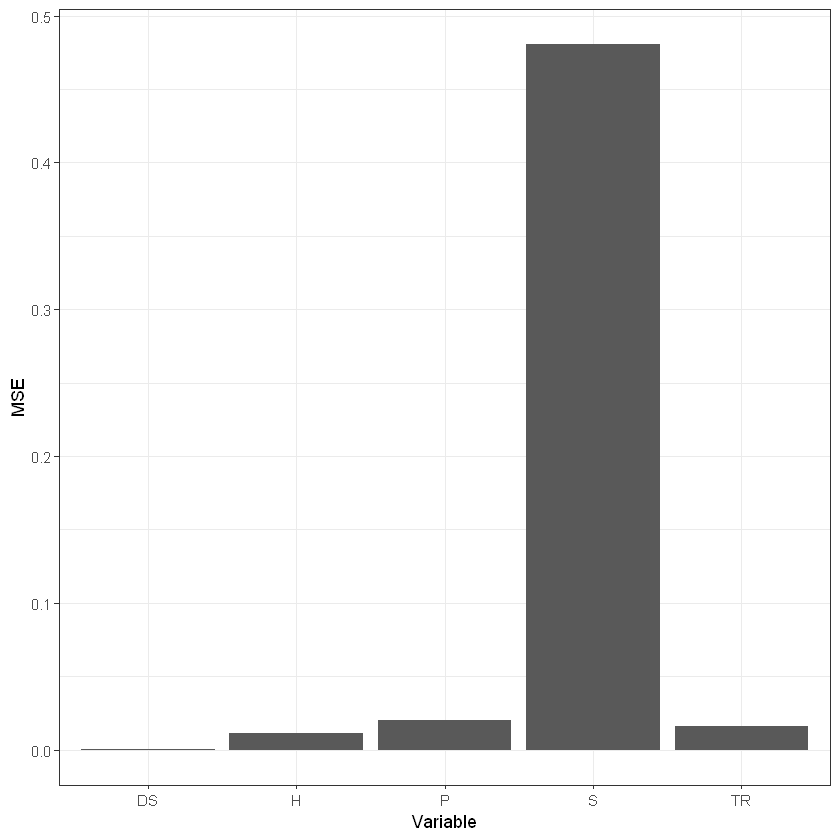

In [15]:
varMSE <- HealthCalibOut$var_ms                  #  Weighted Mean Squared Error                 
plotMSE <- data.frame(names(varMSE),varMSE)
colnames(plotMSE) <- c('Variable','MSE')
ggplot(data = plotMSE,aes(x = Variable,y = MSE)) +
    geom_bar(stat="identity") +
    theme_bw()

By using the `plot` function, We can also investigate the residuals for each time step which can be plotted as a time series using the following command.

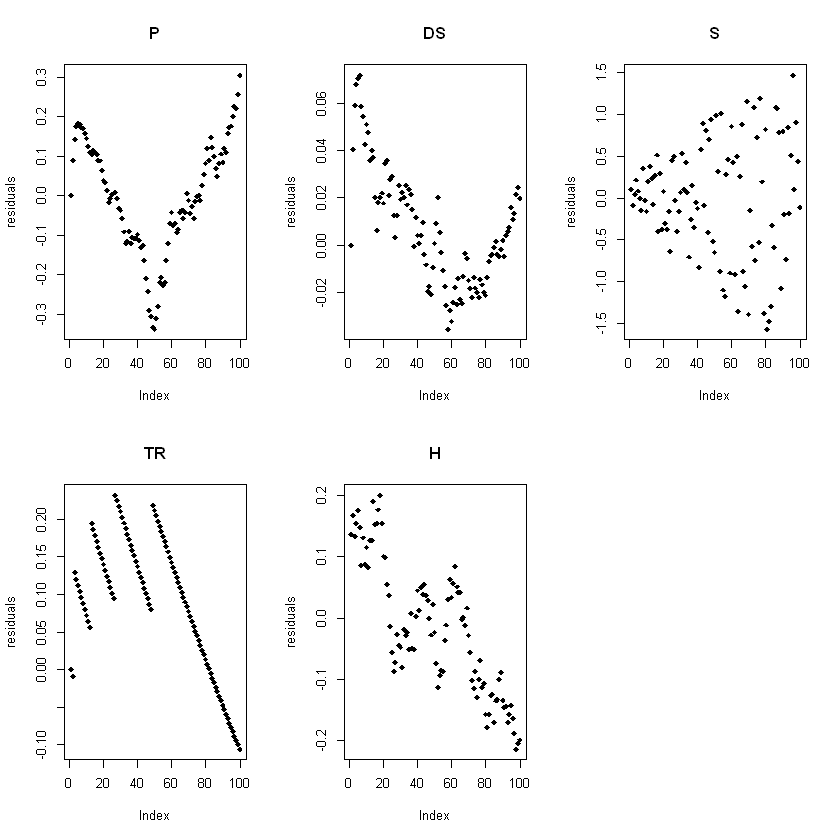

In [16]:
plot(HealthCalibOut)

We can also plot the distribution of the residuals with a histogram.

Using  as id variables


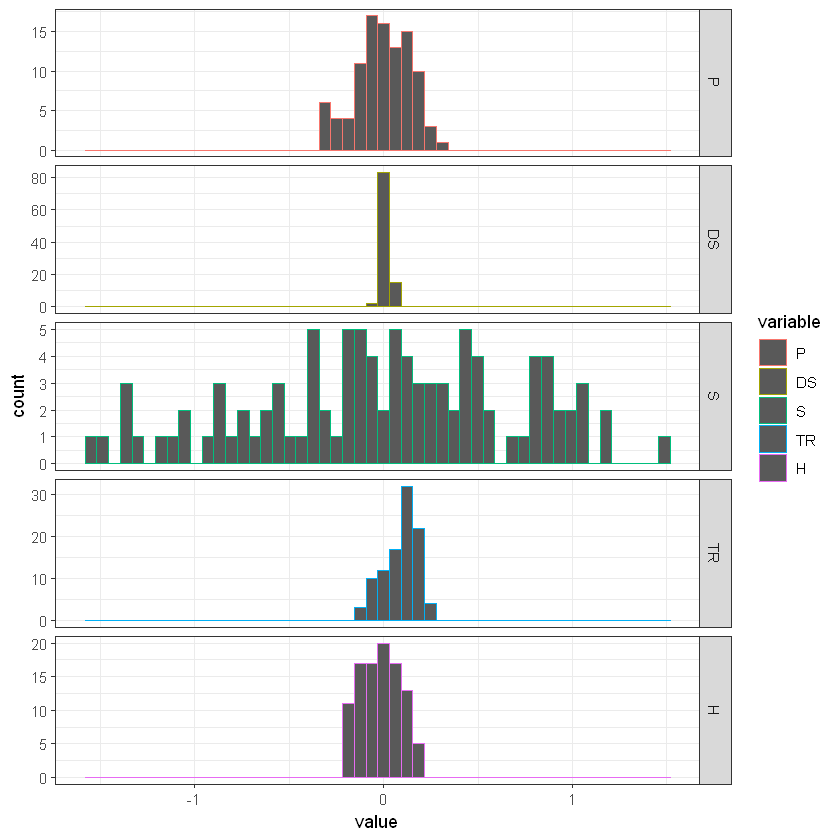

In [17]:
ResidualExtractor <- function(CalibOutput) {                                 # Extract residuals
    varnames <- unique(names(CalibOutput[['residuals']]))
    Res <- sapply(varnames, function(x){ 
        CalibOutput[['residuals']][names(CalibOutput[['residuals']]) == x]    
    })
    return(data.frame(Res))
}
varRes <- ResidualExtractor(HealthCalibOut)
mvarRes = melt(varRes)
ggplot(mvarRes,aes(x=value,color=variable)) + 
    geom_histogram(bins=50) + 
    facet_grid(variable ~ ., scales = "free") +
    theme_bw()

After we have the parameter values that best fit the data, we can store them as the new parameters and rerun the system dynamics model with the new parameter.

In [18]:
CalibParms <- Parms
CalibParms[names(HealthCalibOut$par)] <- HealthCalibOut$par
print(CalibParms)

       alpha         beta        gamma        delta         zeta         eta1 
2.343768e-02 6.930588e+00 1.774340e+00 5.582317e+00 1.215378e+01 1.138784e+01 
        eta2          rho           nu        sigma        theta       lambda 
1.000000e+00 8.478049e+01 1.000000e-02 5.469444e+01 1.000000e-02 5.000000e-01 
          mu          phi        omega 
2.047747e+01 1.000000e-02 5.000000e+04 


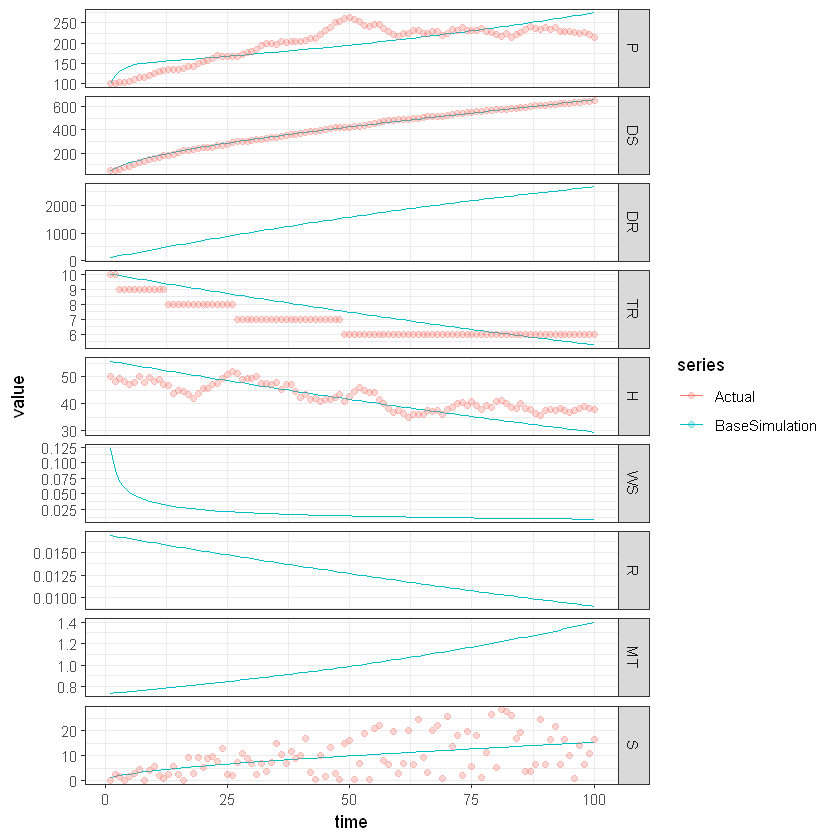

In [19]:
CalibOutData <- data.frame(ode(InitStocks,trange,HealthDataMod,CalibParms,'rk4'))
SimData <- melt(CalibOutData, id.vars='time')
SimData$series <- 'BaseSimulation'
ActData <- melt(actualData, id.vars = 'time')
ActData$series <- 'Actual'
ggplot() + 
  geom_line(aes(x = time,y = value,color = series,group=series),data = SimData) +
  geom_point(aes(x = time,y = value,color = series),data = ActData,alpha=.3) + 
  facet_grid(variable ~ .,scales= 'free_y') +
  theme_bw()

If the user wants to conduct a Markov Chain Monte Carlo (MCMC) analysis, they can do it easily with built in `modMCMC` function the **FME** package.  This packages allows us to explore the parameter space and understand the sensitivities of each parameters based on a Monte Carlo sampling.

number of accepted runs: 204 out of 1000 (20.4%) 


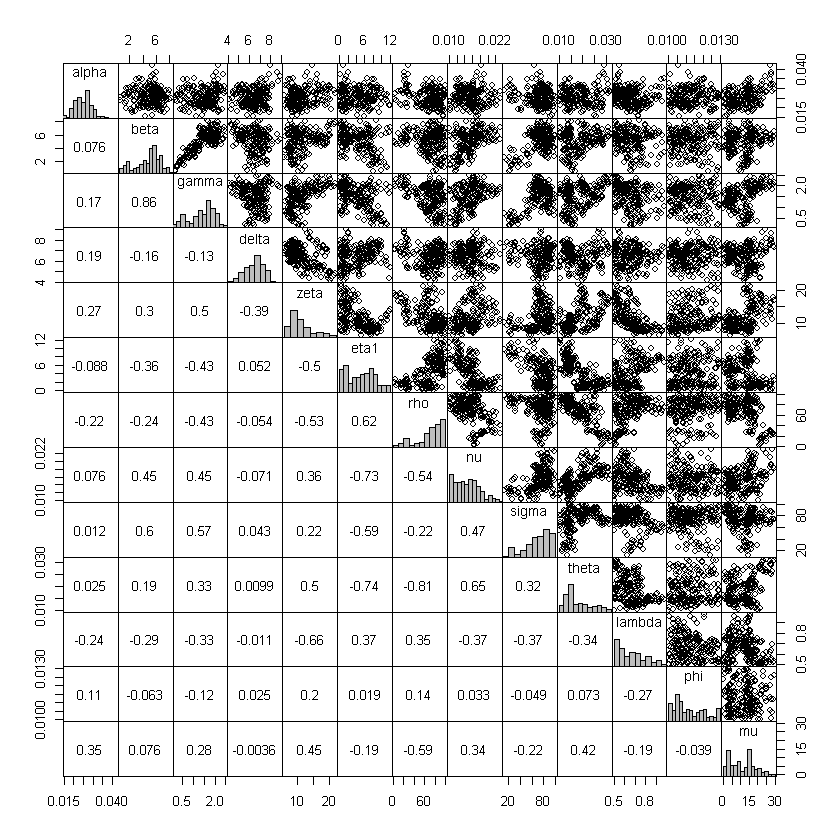

In [20]:
HealthMCMC <- function(parvalue,parmin,parmax,yactual,time,stocks,parms){
    MCMCout <- modMCMC(
        f = CostFunction, 
        p = parvalue, 
        niter = 1000,
        lower = parmin,
        upper = parmax,
        time = time,
        stocks = stocks,
        parms = parms,
        yactual = yactual
    )
    return(MCMCout)
}
HealthMCMCout <- HealthMCMC(HealthCalibOut$par,pmin,pmax,longActualData,trange,InitStocks,Parms)
pairs(HealthMCMCout)

## Scenario and Policy Analysis
Now that we have a working model, it is possible to conduct policy experiments by conducting a sensitivity analysis on our system dynamics model by varying the parameters that correspond with different policy interventions.  We have set up three experiments:
1. Increased cyber security attacks (Security Risk)
2. Better machine learning and artifical algorithms (Data Technology)
3. Increased data capture and interoperability in clinical trials (Data generated per trial)

We conduct our first policy experiment by running the model with security risk $\alpha$ being tripled.  The base run (calibrated run in the previous section) can be considered as the "business-as-usual" scenario.  In these policy experiments, we are comparing the base run with alternative scenario with the adjusted parameters.

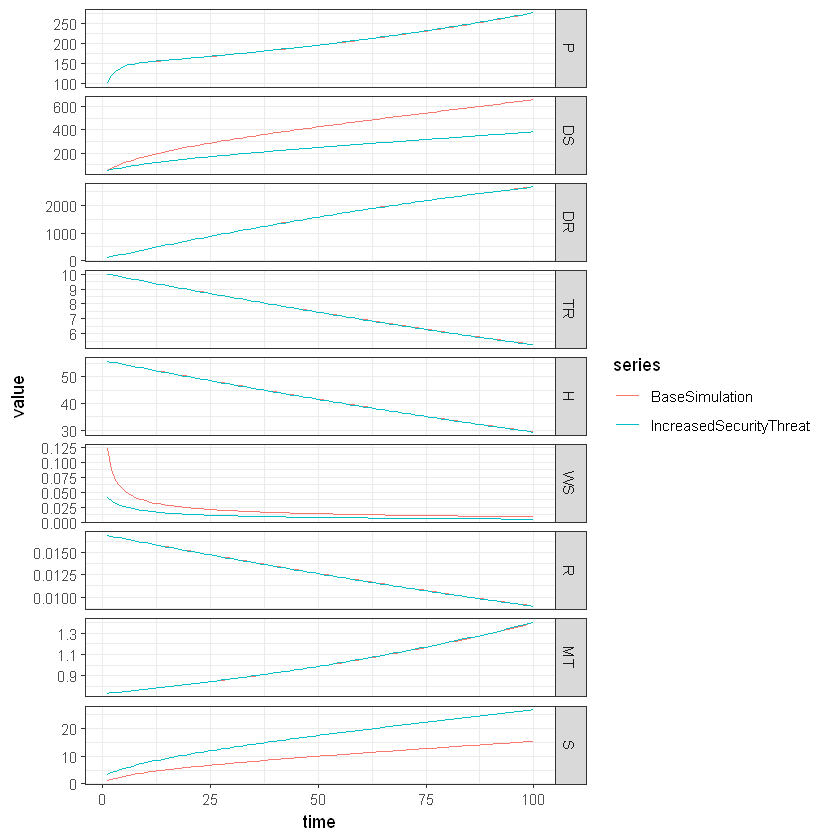

In [21]:
SecParms <- CalibParms 
SecParms['alpha'] <- CalibParms['alpha'] * 3
SecOutData <- data.frame(ode(InitStocks,trange,HealthDataMod,SecParms,'rk4'))
SecData <- melt(SecOutData, id.vars='time')
SecData$series <- 'IncreasedSecurityThreat'
SecData <- rbind(SecData,SimData)
ggplot(aes(x = time,y = value,color = series),data = SecData) + 
  geom_line() + 
  facet_grid(variable ~ .,scales= 'free_y') +
  theme_bw()

The second policy experiment was run with the data technology parameter $\eta_1$ being doubled.  This, again, was compared with the base run.  

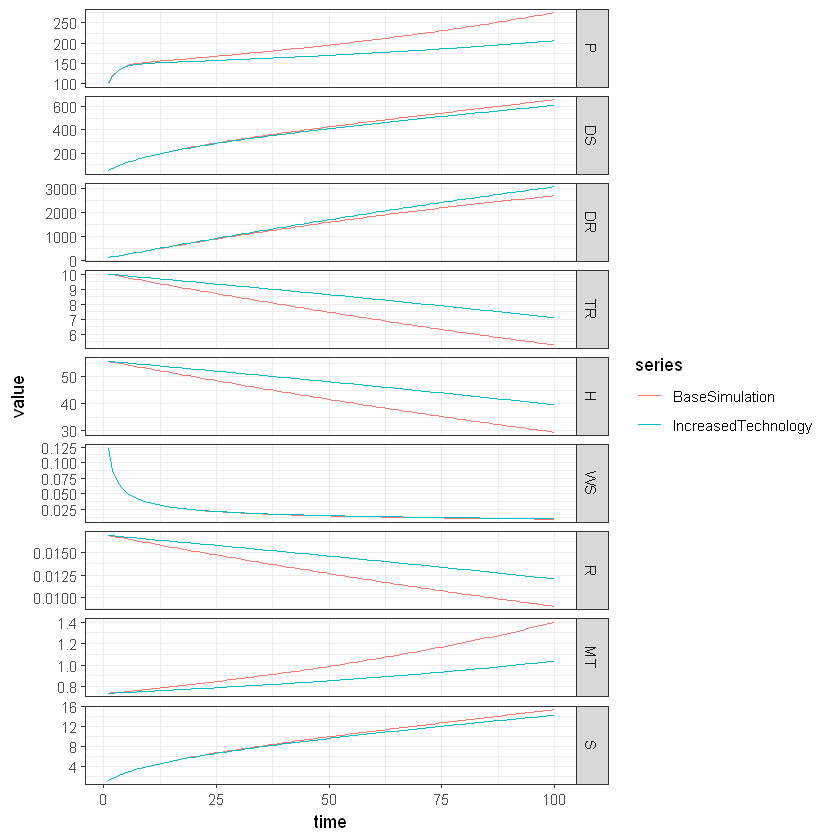

In [22]:
AIParms <- CalibParms 
AIParms['eta1'] <- CalibParms['eta1'] * 2
AIOutData <- data.frame(ode(InitStocks,trange,HealthDataMod,AIParms,'rk4'))
AIData <- melt(AIOutData, id.vars='time')
AIData$series <- 'IncreasedTechnology'
AIData <- rbind(AIData,SimData)
ggplot(aes(x = time,y = value,color = series),data = AIData) + 
  geom_line() + 
  facet_grid(variable ~ .,scales= 'free_y') +
  theme_bw()

The final scenario (better interoperability of clinical trials) is simulated in the following against the base run. 

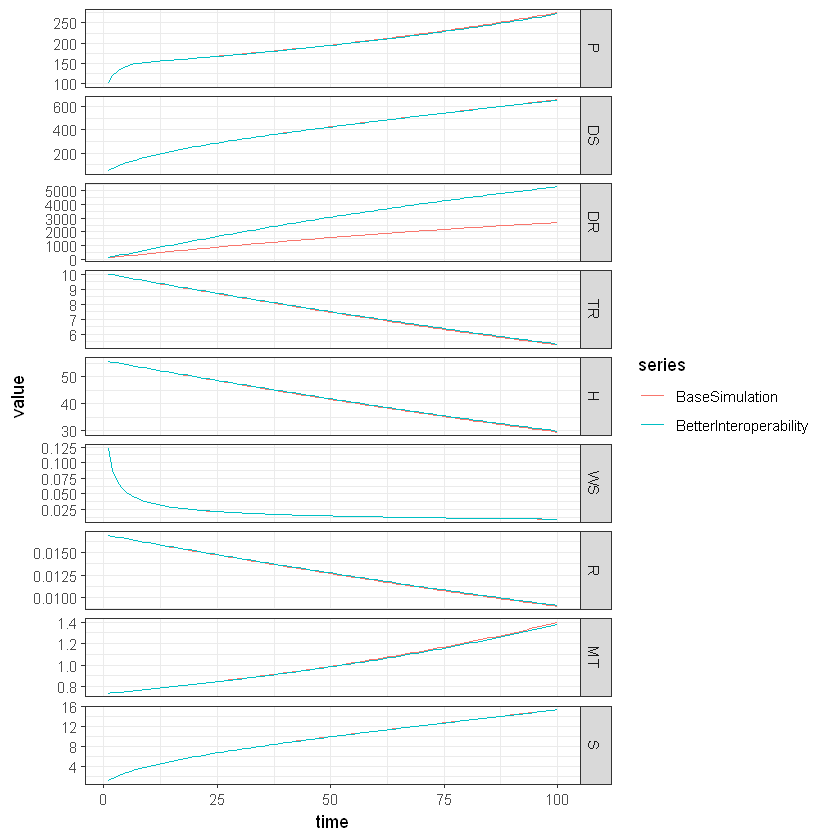

In [23]:
IOParms <- CalibParms 
IOParms['mu'] <- CalibParms['mu'] * 2
IOOutData <- data.frame(ode(InitStocks,trange,HealthDataMod,IOParms,'rk4'))
IOData <- melt(IOOutData, id.vars='time')
IOData$series <- 'BetterInteroperability'
IOData <- rbind(IOData,SimData)
ggplot(aes(x = time,y = value,color = series),data = IOData) + 
  geom_line() + 
  facet_grid(variable ~ .,scales= 'free_y') +
  theme_bw()